<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [5]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 154.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.5 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [6]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-08-04 12:53:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.1MB/s    in 3.1s    

2025-08-04 12:53:07 (49.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [19]:
import sqlite3
conn = sqlite3.connect("survey-data.sqlite")
df.to_sql("main", conn, if_exists="replace", index=False)


65437

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [20]:
import random

In [21]:
def map_age_random(age_str):
    try:
        if '-' in age_str:
            age_str = age_str.replace(' years old', '').strip()
            low, high = age_str.split('-')
            return random.randint(int(low.strip()), int(high.strip()))
        elif 'Under' in age_str:
            return random.randint(10, 17)
        elif '65 or older' in age_str:
            return random.randint(65, 75)
        else:
            return None
    except:
        return None

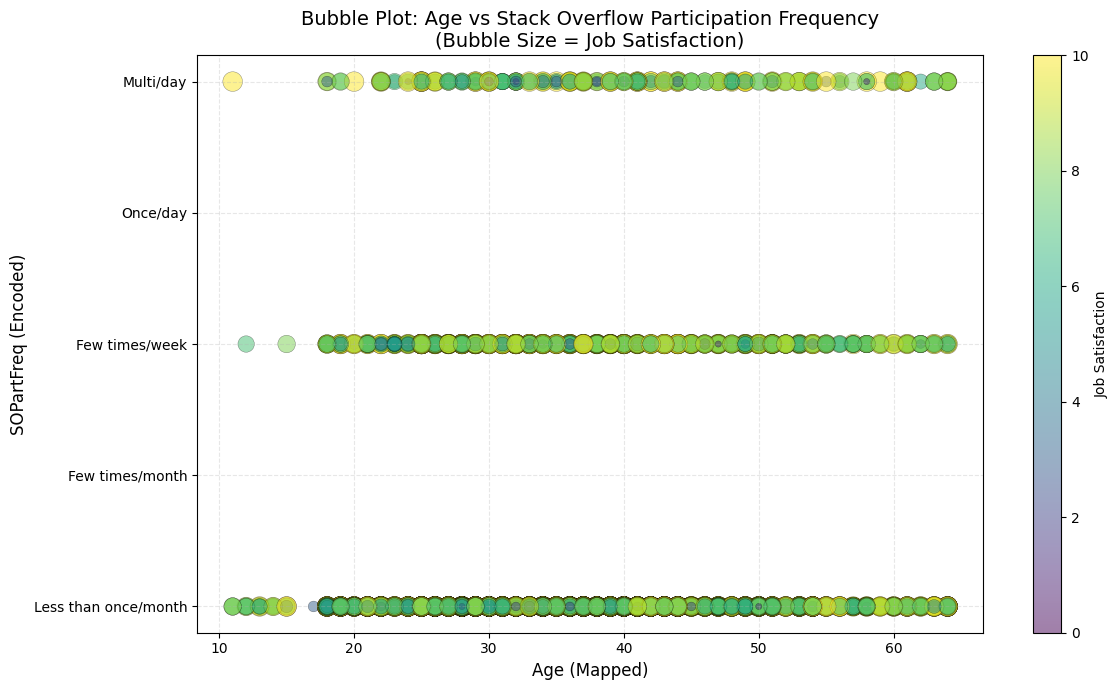

In [22]:
query = """
SELECT Age, SOPartFreq, JobSat
FROM main
WHERE Age IS NOT NULL 
  AND SOPartFreq IS NOT NULL 
  AND JobSat IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

part_freq_map = {
    "Multiple times per day": 5,
    "Once a day": 4,
    "A few times per week": 3,
    "A few times per month": 2,
    "Less than once per month or monthly": 1,
}

random.seed(42)
df['AgeMapped'] = df['Age'].apply(map_age_random)
df['SOPartFreqEncoded'] = df['SOPartFreq'].map(part_freq_map)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

df_clean = df.dropna(subset=['AgeMapped', 'SOPartFreqEncoded', 'JobSat'])


plt.figure(figsize=(12, 7))
plt.scatter(
    df_clean['AgeMapped'],
    df_clean['SOPartFreqEncoded'],
    s=df_clean['JobSat'] * 20,  # Scale bubble size
    alpha=0.5,
    c=df_clean['JobSat'],
    cmap='viridis',
    edgecolors='k',
    linewidth=0.3
)


plt.title('Bubble Plot: Age vs Stack Overflow Participation Frequency\n(Bubble Size = Job Satisfaction)', fontsize=14)
plt.xlabel('Age (Mapped)', fontsize=12)
plt.ylabel('SOPartFreq (Encoded)', fontsize=12)
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=[
    'Less than once/month', 'Few times/month', 'Few times/week', 'Once/day', 'Multi/day'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.colorbar(label='Job Satisfaction')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


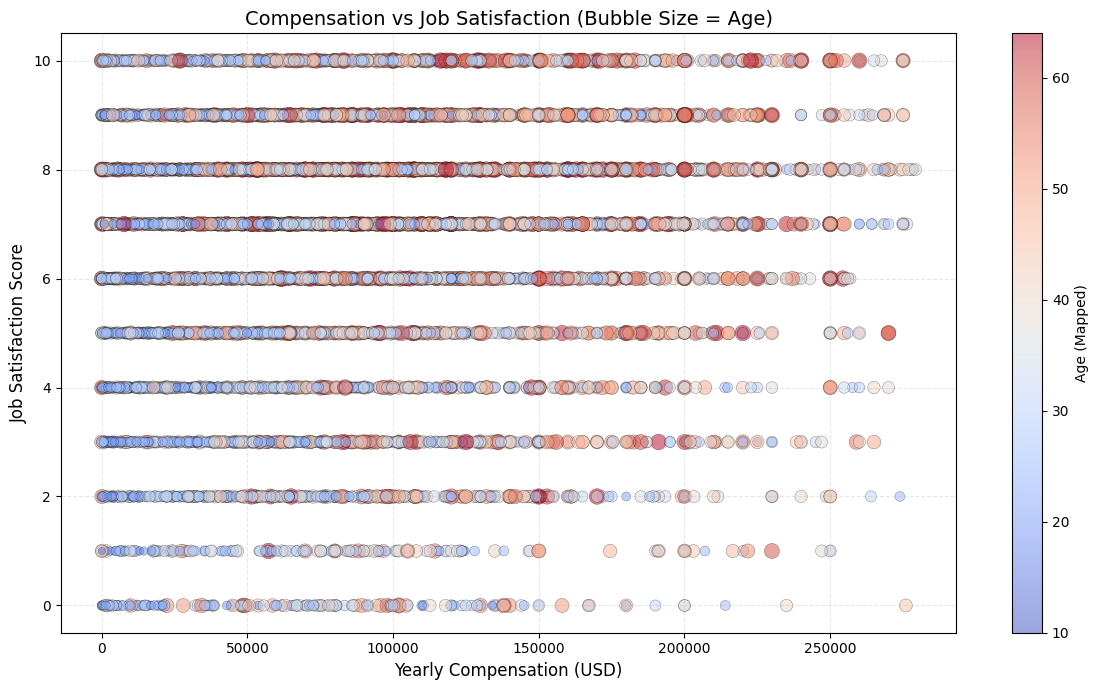

In [23]:
query = """
SELECT ConvertedCompYearly, JobSat, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSat IS NOT NULL 
  AND Age IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

random.seed(42)
df['AgeMapped'] = df['Age'].apply(map_age_random)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'AgeMapped'])

comp_threshold = df_clean['ConvertedCompYearly'].quantile(0.98)
df_clean = df_clean[df_clean['ConvertedCompYearly'] < comp_threshold]

plt.figure(figsize=(12, 7))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSat'],
    s=df_clean['AgeMapped'] * 2,  
    alpha=0.5,
    c=df_clean['AgeMapped'],
    cmap='coolwarm',
    edgecolors='k',
    linewidth=0.3
)

plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.colorbar(label='Age (Mapped)')
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_301/218168588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


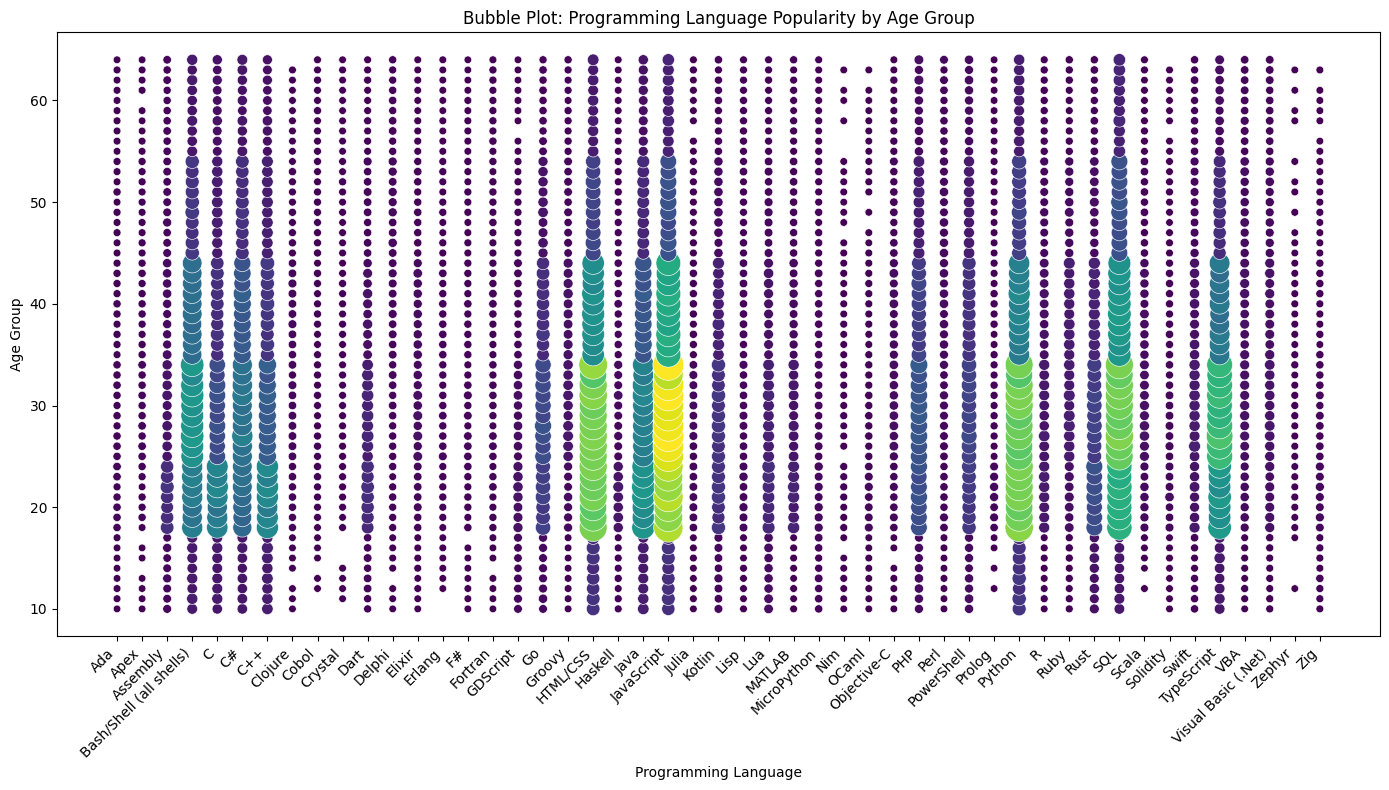

In [24]:
query = """
SELECT Age, LanguageHaveWorkedWith
FROM main
WHERE Age IS NOT NULL 
  AND LanguageHaveWorkedWith IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df['AgeGroup'] = df['Age'].apply(map_age_random)

df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'AgeGroup'])
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

df_exploded = df_lang.explode('LanguageList')
lang_counts = df_exploded.groupby(['LanguageList', 'AgeGroup']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=lang_counts,
    x='LanguageList',
    y='AgeGroup',
    size='Count',
    hue='Count',
    sizes=(30, 500),
    palette='viridis',
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot: Programming Language Popularity by Age Group')
plt.xlabel('Programming Language')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


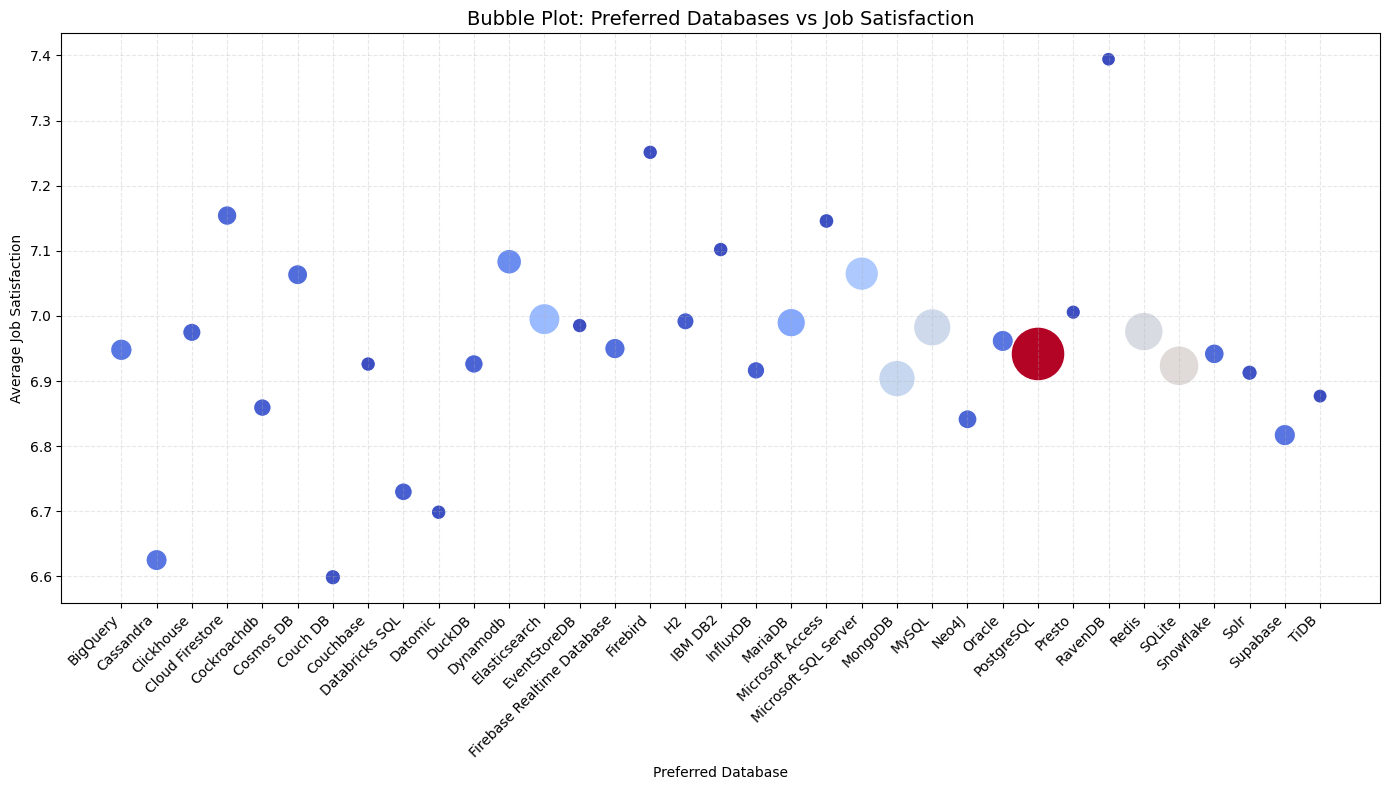

In [25]:
query = """
SELECT DatabaseWantToWorkWith, JobSat
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL 
  AND JobSat IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)


df_db = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])
df_db['DatabaseList'] = df_db['DatabaseWantToWorkWith'].str.split(';')

df_exploded = df_db.explode('DatabaseList')
db_stats = df_exploded.groupby('DatabaseList').agg({
    'JobSat': 'mean',
    'DatabaseList': 'count'
}).rename(columns={'DatabaseList': 'RespondentCount'}).reset_index()


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=db_stats,
    x='DatabaseList',
    y='JobSat',
    size='RespondentCount',
    hue='RespondentCount',
    sizes=(100, 1500),
    palette='coolwarm',
    legend=False
)


plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot: Preferred Databases vs Job Satisfaction', fontsize=14)
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


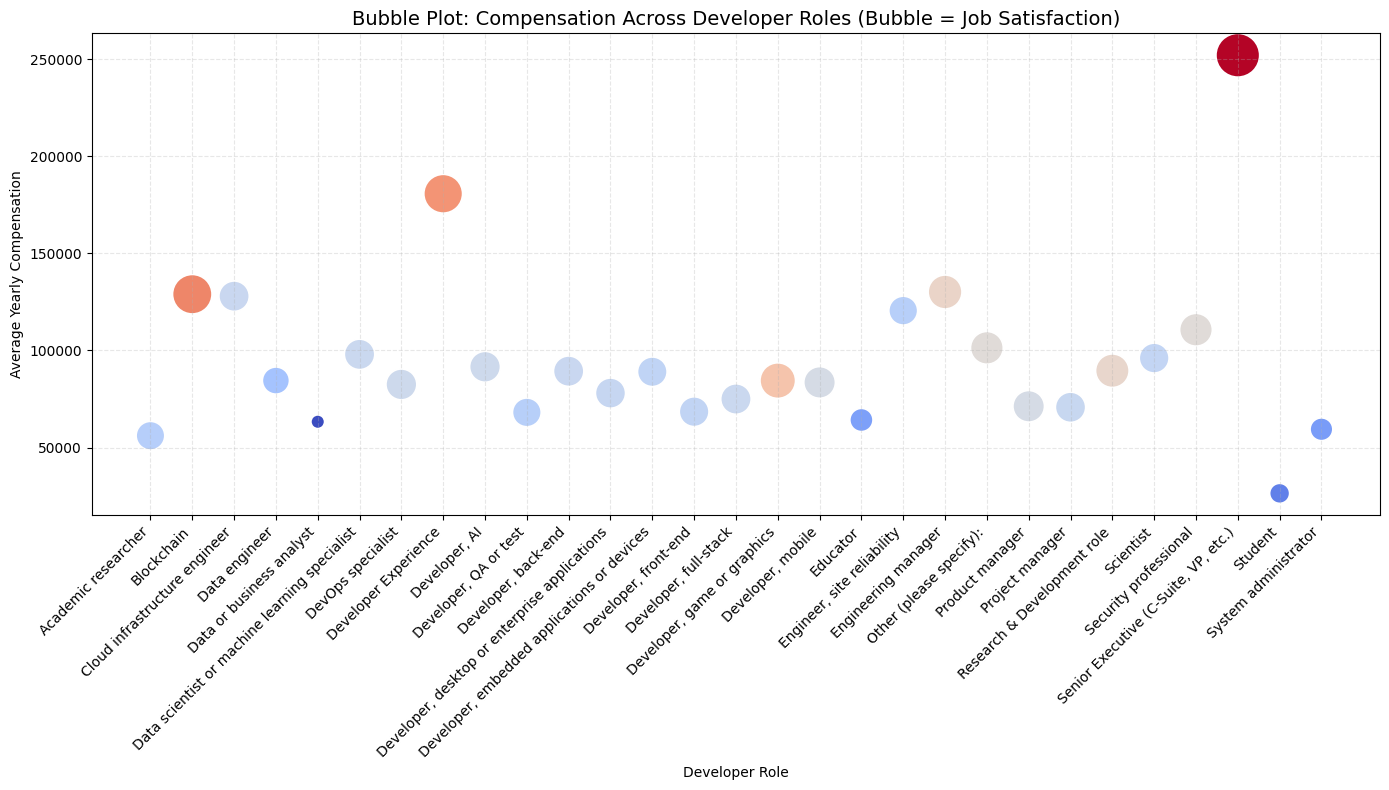

In [26]:
query = """
SELECT ConvertedCompYearly, DevType, JobSat
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND DevType IS NOT NULL 
  AND JobSat IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)


df_dev = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])
df_dev['DevTypeList'] = df_dev['DevType'].str.split(';')
df_exploded = df_dev.explode('DevTypeList')


dev_stats = df_exploded.groupby('DevTypeList').agg({
    'ConvertedCompYearly': 'mean',
    'JobSat': 'mean',
    'DevTypeList': 'count'
}).rename(columns={'DevTypeList': 'RespondentCount'}).reset_index()


dev_stats = dev_stats[dev_stats['RespondentCount'] > 50]

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=dev_stats,
    x='DevTypeList',
    y='ConvertedCompYearly',
    size='JobSat',
    hue='JobSat',
    sizes=(100, 1000),
    palette='coolwarm',
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot: Compensation Across Developer Roles (Bubble = Job Satisfaction)', fontsize=14)
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


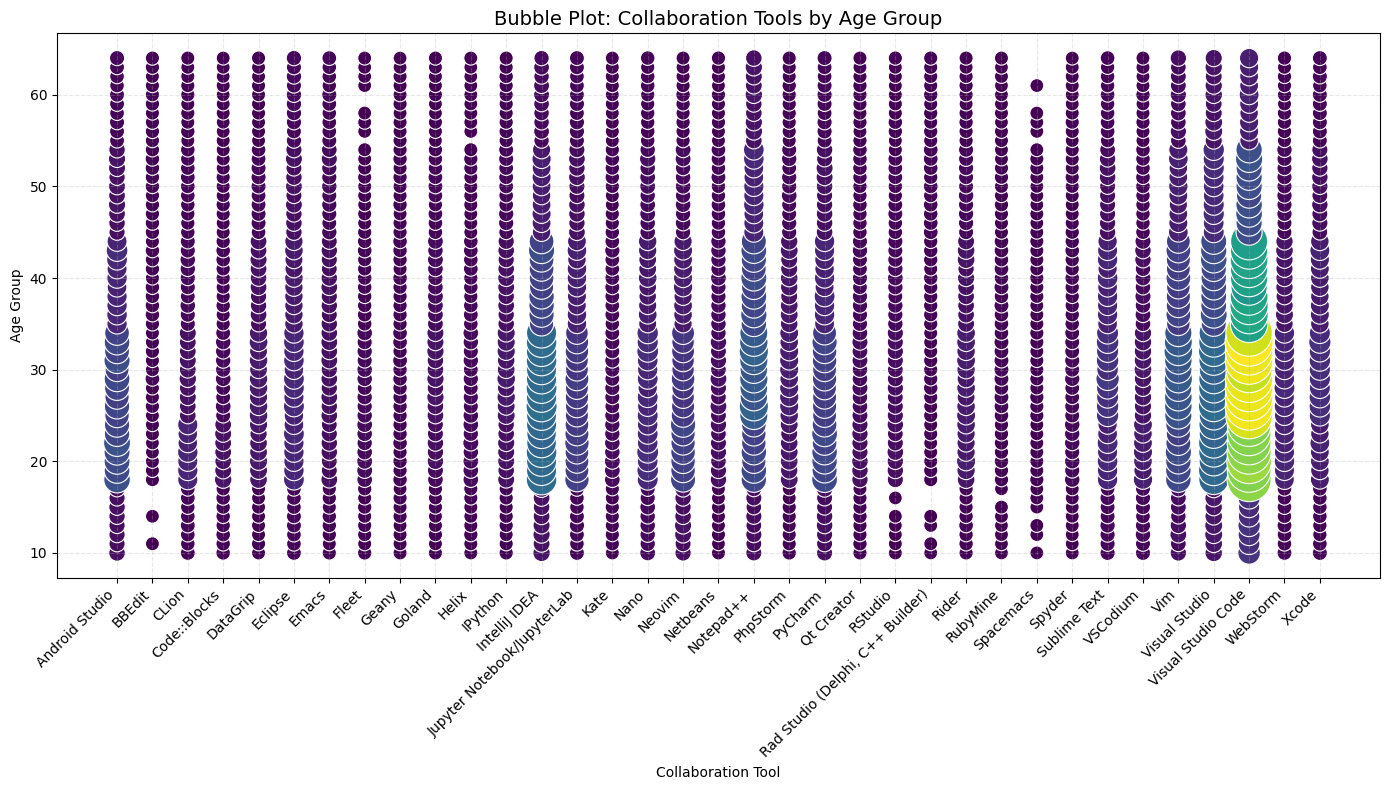

In [27]:
query = """
SELECT Age, NEWCollabToolsHaveWorkedWith
FROM main
WHERE Age IS NOT NULL 
  AND NEWCollabToolsHaveWorkedWith IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df_collab = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])
df_collab['AgeGroup'] = df_collab['Age'].apply(map_age_random)
df_collab['ToolList'] = df_collab['NEWCollabToolsHaveWorkedWith'].str.split(';')

df_exploded = df_collab.explode('ToolList')

tool_stats = df_exploded.groupby(['ToolList', 'AgeGroup']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=tool_stats,
    x='ToolList',
    y='AgeGroup',
    size='Count',
    hue='Count',
    sizes=(100, 1200),
    palette='viridis',
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot: Collaboration Tools by Age Group', fontsize=14)
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



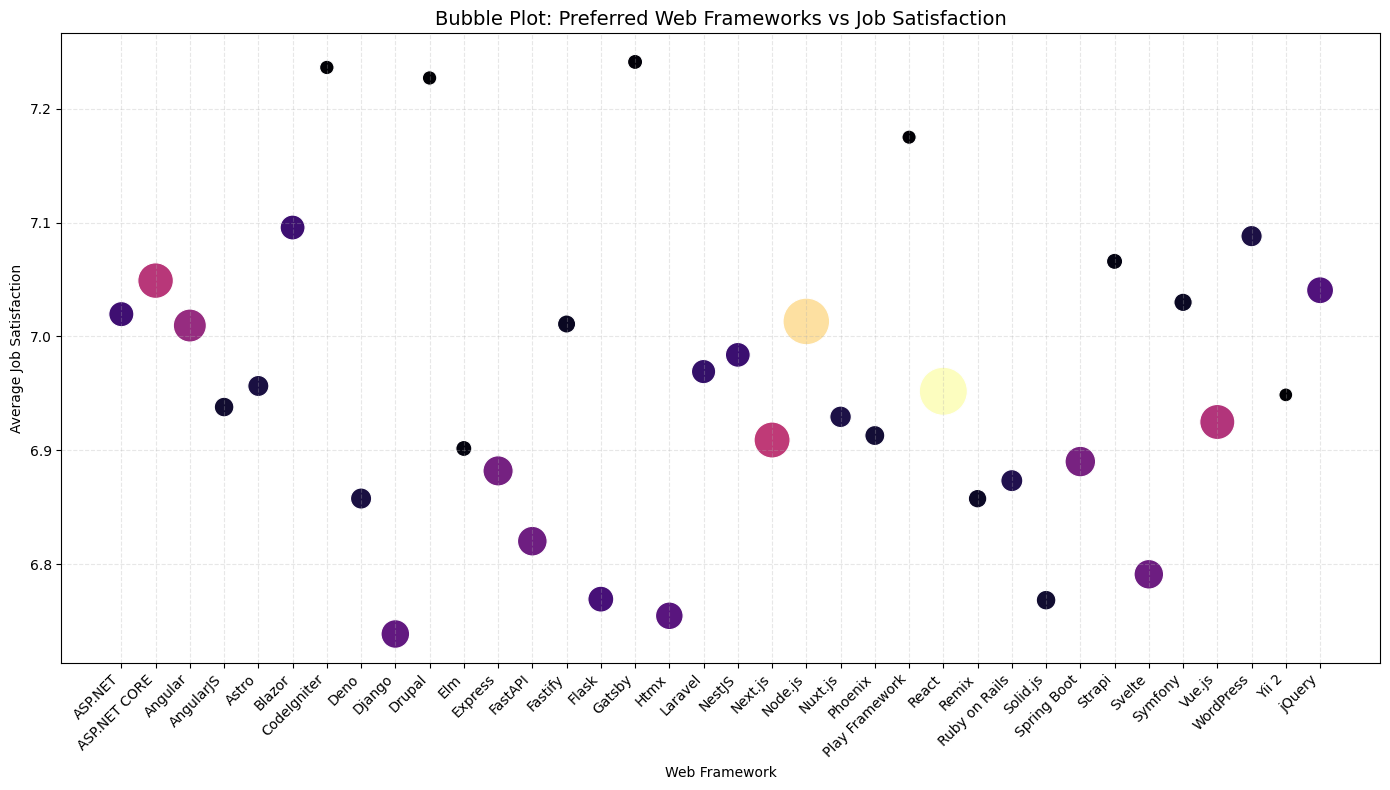

In [28]:
query = """
SELECT WebframeWantToWorkWith, JobSat
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL 
  AND JobSat IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)


df_web = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])
df_web['FrameworkList'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_exploded = df_web.explode('FrameworkList')

framework_stats = df_exploded.groupby('FrameworkList').agg({
    'JobSat': 'mean',
    'FrameworkList': 'count'
}).rename(columns={'FrameworkList': 'RespondentCount'}).reset_index()

framework_stats = framework_stats[framework_stats['RespondentCount'] > 50]

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=framework_stats,
    x='FrameworkList',
    y='JobSat',
    size='RespondentCount',
    hue='RespondentCount',
    sizes=(100, 1200),
    palette='magma',
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot: Preferred Web Frameworks vs Job Satisfaction', fontsize=14)
plt.xlabel('Web Framework')
plt.ylabel('Average Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



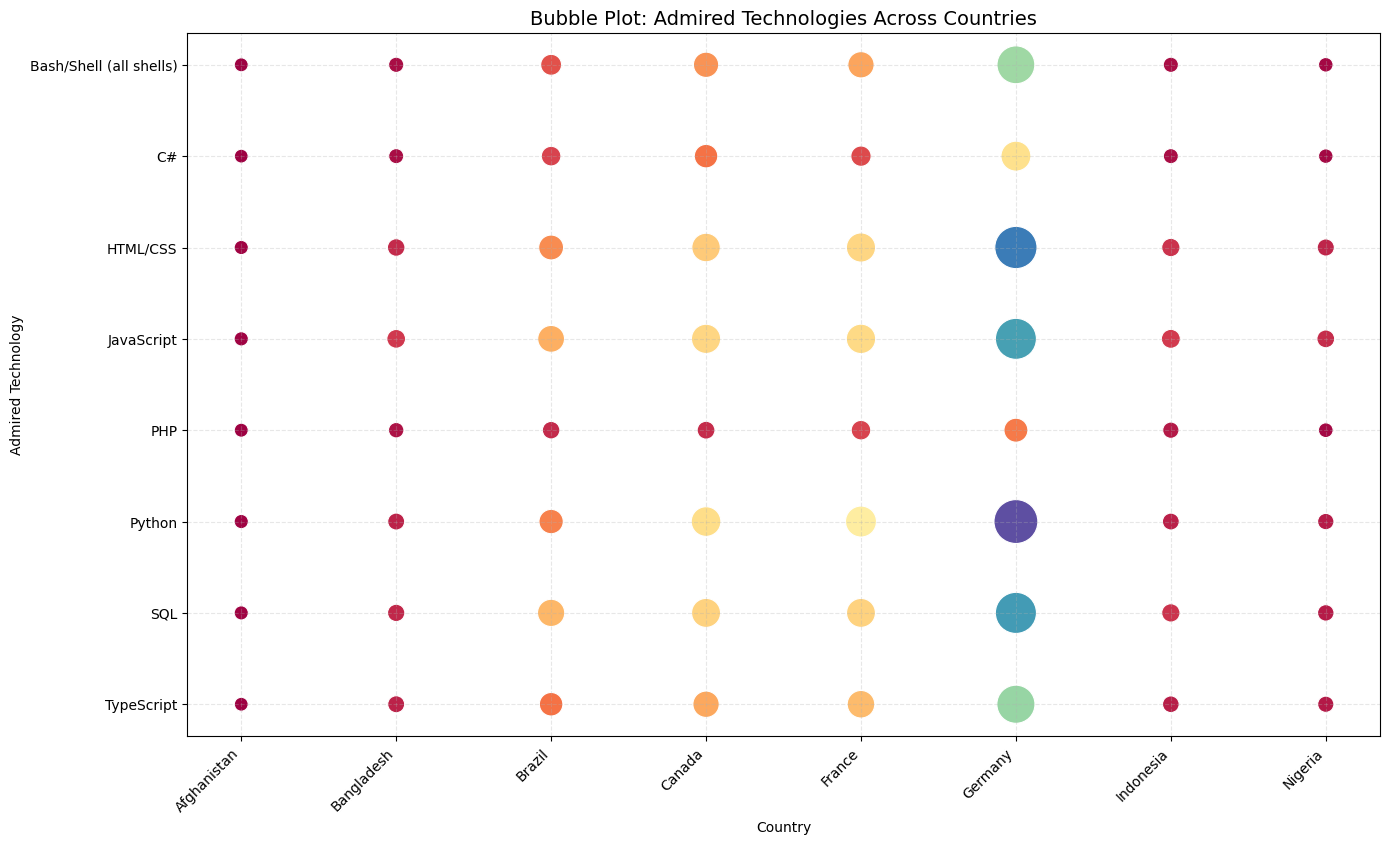

In [29]:
query = """
SELECT Country, LanguageAdmired
FROM main
WHERE Country IS NOT NULL 
  AND LanguageAdmired IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df_admire = df.dropna(subset=['LanguageAdmired', 'Country'])
df_admire['AdmiredList'] = df_admire['LanguageAdmired'].str.split(';')
df_exploded = df_admire.explode('AdmiredList')

admire_stats = df_exploded.groupby(['Country', 'AdmiredList']).size().reset_index(name='Count')

top_countries = admire_stats['Country'].value_counts().nlargest(8).index
top_languages = admire_stats['AdmiredList'].value_counts().nlargest(8).index
filtered_stats = admire_stats[
    admire_stats['Country'].isin(top_countries) &
    admire_stats['AdmiredList'].isin(top_languages)
]

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=filtered_stats,
    x='Country',
    y='AdmiredList',
    size='Count',
    hue='Count',
    sizes=(100, 1000),
    palette='Spectral',
    legend=False
)

plt.title('Bubble Plot: Admired Technologies Across Countries', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [30]:
conn.close()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
